In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_data_weather.csv'
df = pd.read_csv(file_path)

In [3]:
df_original_data = df

In [4]:
df['next_1_day_mean_temp'] = df_original_data['mean_temp'].shift(-1)
df['next_2_day_mean_temp'] = df_original_data['mean_temp'].shift(-2)
df['next_3_day_mean_temp'] = df_original_data['mean_temp'].shift(-3)
df['next_4_day_mean_temp'] = df_original_data['mean_temp'].shift(-4)
df['next_5_day_mean_temp'] = df_original_data['mean_temp'].shift(-5)
df['next_6_day_mean_temp'] = df_original_data['mean_temp'].shift(-6)
df['next_7_day_mean_temp'] = df_original_data['mean_temp'].shift(-7)

In [5]:
df.dropna(inplace=True)

##### cloud_cover processing

In [6]:
df['cloud_cover'].value_counts()

7.0    3115
6.0    2951
5.0    2292
8.0    1902
4.0    1815
3.0    1148
2.0     859
1.0     603
0.0     375
5.8       2
6.8       2
5.4       2
7.4       2
9.0       2
5.6       1
6.2       1
6.6       1
7.2       1
Name: cloud_cover, dtype: int64

In [7]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# remove outlier
df = df[~condition]

In [8]:
df['cloud_cover'].value_counts()

7.0    3115
6.0    2951
5.0    2292
8.0    1902
4.0    1815
3.0    1148
2.0     859
1.0     603
0.0     375
Name: cloud_cover, dtype: int64

##### change the sunshine into hours¶

In [9]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-9-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


##### change snow depth into a category value¶

In [10]:
df['snow_depth'].value_counts()

0.0     14929
1.0        45
2.0        23
4.0        15
3.0        15
5.0         6
6.0         4
7.0         4
8.0         4
10.0        2
0.4         2
12.0        2
11.0        2
9.0         1
18.0        1
13.0        1
15.0        1
16.0        1
22.0        1
0.8         1
Name: snow_depth, dtype: int64

In [11]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [12]:
df['snow_depth'].value_counts()

0.0    14929
1.0      131
Name: snow_depth, dtype: int64

##### change the precipitation into category value¶

In [13]:
df['precipitation'].value_counts()

0.00     7905
0.20     1005
0.40      452
0.10      313
0.60      296
         ... 
53.10       1
18.70       1
25.40       1
20.00       1
0.46        1
Name: precipitation, Length: 261, dtype: int64

In [14]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-14-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [15]:
df['precipitation'].value_counts()

0    7905
1    4249
2    2335
3     567
4       4
Name: precipitation, dtype: int64

##### one-hot encoding

In [16]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [17]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [18]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

In [19]:
del df['date']

##### normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

##### check if any INF or NAN

In [21]:
inf_check = np.isinf(df)
print(inf_check.any())

sunshine                False
global_radiation        False
max_temp                False
mean_temp               False
min_temp                False
pressure                False
next_1_day_mean_temp    False
next_2_day_mean_temp    False
next_3_day_mean_temp    False
next_4_day_mean_temp    False
next_5_day_mean_temp    False
next_6_day_mean_temp    False
next_7_day_mean_temp    False
cloud_cover_0.0         False
cloud_cover_1.0         False
cloud_cover_2.0         False
cloud_cover_3.0         False
cloud_cover_4.0         False
cloud_cover_5.0         False
cloud_cover_6.0         False
cloud_cover_7.0         False
cloud_cover_8.0         False
precipitation_0         False
precipitation_1         False
precipitation_2         False
precipitation_3         False
precipitation_4         False
snow_depth_0.0          False
snow_depth_1.0          False
dtype: bool


In [22]:
inf_check = np.isnan(df)
print(inf_check.any())

sunshine                False
global_radiation        False
max_temp                False
mean_temp               False
min_temp                False
pressure                False
next_1_day_mean_temp    False
next_2_day_mean_temp    False
next_3_day_mean_temp    False
next_4_day_mean_temp    False
next_5_day_mean_temp    False
next_6_day_mean_temp    False
next_7_day_mean_temp    False
cloud_cover_0.0         False
cloud_cover_1.0         False
cloud_cover_2.0         False
cloud_cover_3.0         False
cloud_cover_4.0         False
cloud_cover_5.0         False
cloud_cover_6.0         False
cloud_cover_7.0         False
cloud_cover_8.0         False
precipitation_0         False
precipitation_1         False
precipitation_2         False
precipitation_3         False
precipitation_4         False
snow_depth_0.0          False
snow_depth_1.0          False
dtype: bool


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['next_1_day_mean_temp','next_2_day_mean_temp','next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp'], axis=1)
y = df[['next_1_day_mean_temp', 'next_2_day_mean_temp', 'next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp']]

#### chech if the GPU is available or not

In [24]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


#### train validation test

In [25]:
from sklearn.model_selection import train_test_split

# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:
# 打印划分后的数据集大小
print("train dataset:", X_train.shape)
print("validation dataset:", X_val.shape)
print("test dataset:", X_test.shape)

train dataset: (9638, 22)
validation dataset: (2410, 22)
test dataset: (3012, 22)


In [27]:
# 打印划分后的数据集大小
print("train(target) dataset:", y_train.shape)
print("validation(target) dataset:", y_val.shape)
print("test(target) dataset:", y_test.shape)

train(target) dataset: (9638, 7)
validation(target) dataset: (2410, 7)
test(target) dataset: (3012, 7)


#### change the data type

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(42)  # set the random seed

device = torch.device("cuda")

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

#### Create a TensorDataset from the tensors

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

#### construct the MLP model

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size, activation = nn.ReLU()):
    super(MLP, self).__init__()

    # Create a list to store the layers
    layers = []

    # Add the input layer
    layers.append(nn.Linear(input_size, hidden_sizes[0]))
    # Initializing
    if isinstance(activation, nn.ReLU):
        nn.init.kaiming_normal_(layers[-1].weight, nonlinearity='relu')
    else:
        nn.init.xavier_normal_(layers[-1].weight)
    ###############
    layers.append(activation)

    # Add the hidden layers
    for i in range(1, len(hidden_sizes)):
      layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
      # Initializing
      if isinstance(activation, nn.ReLU):
          nn.init.kaiming_normal_(layers[-1].weight, nonlinearity='relu')
      else:
          nn.init.xavier_normal_(layers[-1].weight)
      ###############
      layers.append(activation)

    # Add the output layer
    layers.append(nn.Linear(hidden_sizes[-1], output_size))
    # Initializing
    nn.init.xavier_normal_(layers[-1].weight)
    ###############
    # Create a sequential model using the layers list
    self.model = nn.Sequential(*layers)

  def forward(self, x):
    out = self.model(x)
    return out

#### early stop function

In [ ]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### define function for training and validation

In [ ]:
# 定义训练和验证过程
def train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, patience=30, delta=0.005):
    train_loss_history = []
    val_loss_history = []
    best_model_state = None

    # 训练模型
    for epoch in range(num_epochs):
        model.train()
        train_total_loss = 0.0
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Clear gradients from the previous iteration
            optimizer.zero_grad()

            # Forward pass: compute model predictions
            predictions = model(X_batch.to(device))
            #print('here is prediction：', predictions.shape)

            # Compute the loss
            loss = criterion(predictions, y_batch.to(device))
            #print('here is loss：', loss.item())

            # Backpropagation: compute gradients of the loss with respect to model parameters
            loss.backward()

            # Optimization: update model parameters using the gradients
            optimizer.step()

            # Accumulate the total loss for this epoch

            train_total_loss += loss.item()

            #print(total_loss)
        # Calculate the average loss for this epoch
        train_loss = train_total_loss / len(train_loader)
        train_loss_history.append(train_loss)
        #print('toatl loss: ', total_loss)
        #print(len(train_loader))
        #print('average loss: ', average_loss)

        #if (epoch + 1) % 10 == 0:
        #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

        model.eval()
        with torch.no_grad():
            val_total_loss = 0.0
            for batch_X, batch_y in val_loader:
                predictions = model(batch_X.to(device))
                loss = criterion(predictions, batch_y.to(device))
                val_total_loss += loss.item()
            validation_loss = val_total_loss / len(val_loader)
            val_loss_history.append(validation_loss)

        # 检查是否早停
        if early_stopping(val_loss_history, patience, delta):
            print("\n Early stopping triggered!")
            best_model_state = model.state_dict()
            break

    return best_model_state

#### fitness function

In [ ]:
def MLPNN_fitness_function(params):

    # Defince the parameters
    hidden_size = int(params[0])
    learning_rate = params[1]
    activation = [nn.Sigmoid(), nn.ReLU(), nn.Tanh()][int(params[2])]
    batch_size = [32, 64, 128, 256][int(params[3])]
    hidden_size1 = int(params[4])
    hidden_size2 = int(params[5])
    hidden_size3 = int(params[6])
    hidden_size4 = int(params[7])
    hidden_size5 = int(params[8])
    #hidden_size6 = int(params[9])
    #hidden_size7 = int(params[10])
    #hidden_size8 = int(params[11])
    #epoch = [100, 100, 100, 100, 100, 100][int(params[12])]
    epoch = [100, 200, 500, 1000][int(params[9])]
    weight_decay = params[10]


    # Specify the batch size
    batch_size = batch_size

    # Create DataLoaders for training, validation, and testing
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)


    #hidden_sizes = [hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5]
    def get_hidden_nodes(hidden_size):
        if hidden_size == 1:
            hidden_sizes = [hidden_size1]
        elif hidden_size == 2:
            hidden_sizes = [hidden_size1, hidden_size2]
        elif hidden_size == 3:
            hidden_sizes = [hidden_size1, hidden_size2, hidden_size3]
        elif hidden_size == 4:
            hidden_sizes = [hidden_size1, hidden_size2, hidden_size3, hidden_size4]
        elif hidden_size == 5:
            hidden_sizes = [hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5]
        else:
            raise ValueError("Unsupported hidden_size. Please choose a value between 1 and 8.")

        #print(hidden_sizes)
        return hidden_sizes

    hidden_sizes = get_hidden_nodes(hidden_size)


    # 初始化模型和优化器
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    device = torch.device("cuda")
    model = MLP(input_size, hidden_sizes, output_size, activation).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    num_epochs = epoch

    # train!!!
    best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.005)
    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    model.eval()

    with torch.no_grad():
        total_mse = 0.0
        for batch_X, batch_y in val_loader:
            # Forward pass: compute model predictions
            predictions = model(batch_X.to(device))

            # Compute the loss (assuming you have defined the loss function as 'criterion')
            mse = criterion(predictions, batch_y.to(device))

            # Accumulate the total loss for this validation set
            total_mse += mse.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mse_loss = total_mse / len(val_loader)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mse_loss

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15078 sha256=2661fa459f83339c60813980d57d1ce20111432faaa5ff6ec6b0f27d07faddb9
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


#### GA


 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping tri

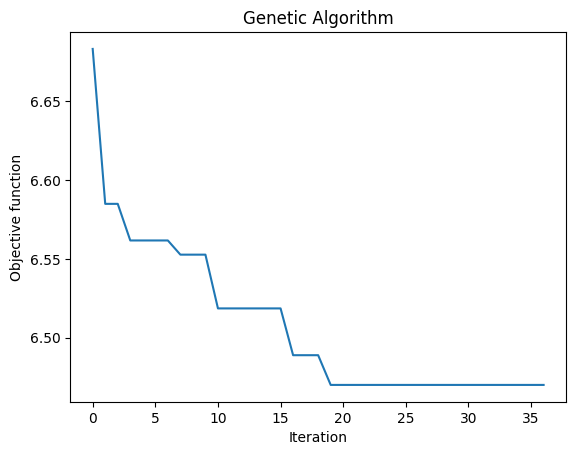

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [1, 5],              # number of hidden layer
                     [0.001, 0.01],           # learning rate
                     [0, 2],               # activation function  0表示Sigmoid，1表示ReLU，2表示Tanh
                     [0, 3],               # batch size
                     [10, 200],             # hidden layer 1
                     [10, 200],             # hidden layer 2
                     [10, 200],             # hidden layer 3
                     [10, 200],             # hidden layer 4
                     [10, 200],             # hidden layer 5
                     [0, 3],               # epoch
                     [0, 0.01]              # L2 norm
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 100, 'population_size': 50, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=MLPNN_fitness_function, dimension=11, variable_type='real',
           variable_type_mixed  = np.array(['int', 'real', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'real']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 500)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




In [ ]:
# Defince the parameters
hidden_size = int(3.00000000e+00)
learning_rate = 2.00205731e-03
activation = [nn.Sigmoid(), nn.ReLU(), nn.Tanh()][int(2.00000000e+00)]
batch_size = [32, 64, 128, 256][int(3.00000000e+00)]
hidden_size1 = int(2.00000000e+01)
hidden_size2 = int(7.30000000e+01)
hidden_size3 = int(1.23000000e+02)
hidden_size4 = int(8.60000000e+01)
hidden_size5 = int(2.00000000e+02)
#hidden_size6 = int(params[9])
#hidden_size7 = int(params[10])
#hidden_size8 = int(params[11])
#epoch = [100, 100, 100, 100, 100, 100][int(params[12])]
epoch = [500, 1000, 2000][int(0.00000000e+00)]
weight_decay = 1.06662394e-04


# Specify the batch size
batch_size = batch_size

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


#hidden_sizes = [hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5]
def get_hidden_nodes(hidden_size):
    if hidden_size == 1:
        hidden_sizes = [hidden_size1]
    elif hidden_size == 2:
        hidden_sizes = [hidden_size1, hidden_size2]
    elif hidden_size == 3:
        hidden_sizes = [hidden_size1, hidden_size2, hidden_size3]
    elif hidden_size == 4:
        hidden_sizes = [hidden_size1, hidden_size2, hidden_size3, hidden_size4]
    elif hidden_size == 5:
        hidden_sizes = [hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5]
    else:
        raise ValueError("Unsupported hidden_size. Please choose a value between 1 and 8.")

    #print(hidden_sizes)
    return hidden_sizes

hidden_sizes = get_hidden_nodes(hidden_size)


# 初始化模型和优化器
input_size = X_train.shape[1]
output_size = y_train.shape[1]
device = torch.device("cuda")
model = MLP(input_size, hidden_sizes, output_size, activation).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.MSELoss()
num_epochs = epoch

# train!!!
best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.005)
#print('this is :', best_model_state)
#model.load_state_dict(best_model_state)



 Early stopping triggered!


In [ ]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [ ]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [ ]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [ ]:
model.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0

    for batch_X, batch_y in test_loader:
        # Forward pass: compute model predictions
        predictions = model(batch_X.to(device))

        # Compute the loss (assuming you have defined the loss function as 'criterion')
        mse = criterion(predictions, batch_y.to(device))
        total_mse += mse.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(predictions - batch_y.to(device)))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(predictions, batch_y.to(device))
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((batch_y.to(device) - predictions) / batch_y.to(device))
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((batch_y.to(device) - predictions) / batch_y.to(device)) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(batch_y.to(device), predictions)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(batch_y.to(device), predictions)
        total_index_agreement += index_agreement





        # Calculate the average loss for the entire validation set
        #print(total_mse)
    mse_loss = total_mse / len(test_loader)
    mae_loss = total_mae / len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    md_ae_loss = total_md_ae / len(test_loader)
    mape_loss = total_mape / len(test_loader)
    rmspe_loss = total_rmspe / len(test_loader)
    pearson_corr_avg = total_pearson_corr / len(test_loader)
    index_agreement_avg = total_index_agreement / len(test_loader)

print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {mae_loss:.4f}')
print(f'MAE: {rmse_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')


MSE: 6.3918
RMSE: 1.9559
MAE: 2.5282
MdAE: 1.5540
MAPE: 37.6018
RMSPE: 166.8914
Pearson Coefficient: 0.8953
Index of Agreement (IoA): 0.9423
